# Fashion MNIST

In [27]:
import tensorflow as tf
print(tf.config.list_physical_devices())

# tf.keras.utils.set_random_seed(812)
# tf.config.experimental.enable_op_determinism()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [28]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [29]:
PX_ROWS = 28
PX_COLS = 28
CLASSES_NUM = 10
EPOCHS_NUM = 10

from tensorflow.keras.optimizers import SGD, Adam
OPTIMIZER = lambda: Adam()
# OPTIMIZER = lambda: SGD(learning_rate=0.01, momentum=0.01)

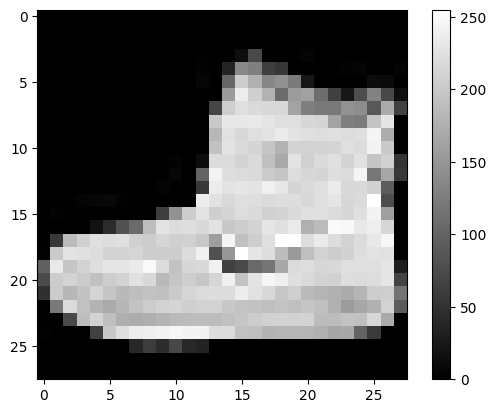

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0], cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.show()

In [31]:
train_images = train_images / 255.0
test_images = test_images / 255.0

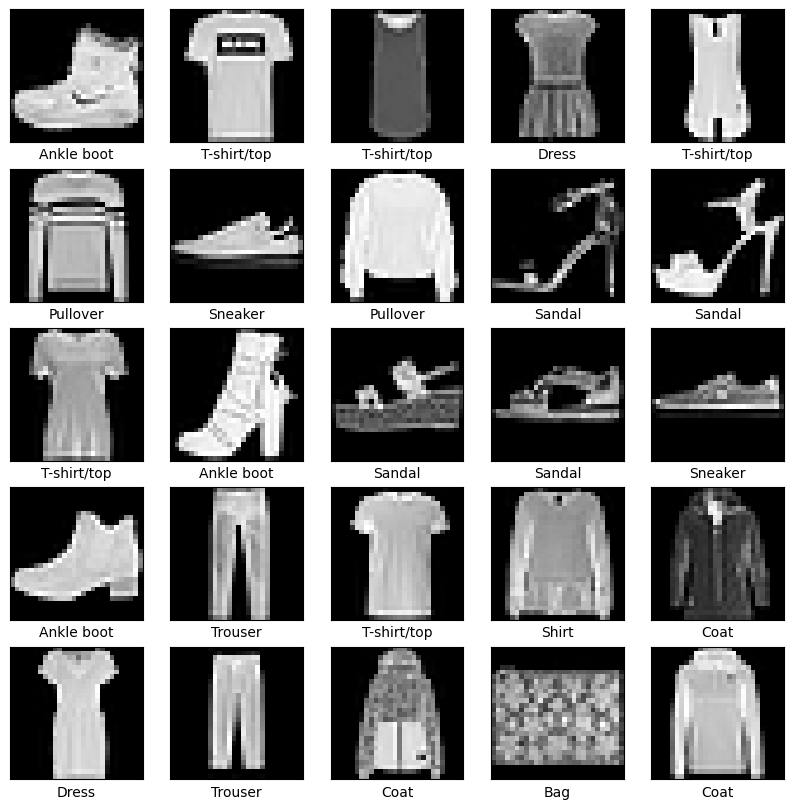

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## RVMLPNN

In [33]:
RVMLPNN_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(PX_ROWS, PX_COLS,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [34]:
RVMLPNN_model.compile(optimizer=OPTIMIZER(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
RVMLPNN_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
RVMLPNN_history = RVMLPNN_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=EPOCHS_NUM, verbose=1)
RVMLPNN_model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4953 - accuracy: 0.8266 - val_loss: 0.4474 - val_accuracy: 0.8393
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3736 - accuracy: 0.8648 - val_loss: 0.3989 - val_accuracy: 0.8582
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3364 - accuracy: 0.8764 - val_loss: 0.3752 - val_accuracy: 0.8641
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3129 - accuracy: 0.8849 - val_loss: 0.3628 - val_accuracy: 0.8648
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2950 - accuracy: 0.8915 - val_loss: 0.3619 - val_accuracy: 0.8693
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2814 - accuracy: 0.8961 - val_loss: 0.3560 - val_accuracy: 0.8753
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2680 - accuracy: 0.9007 - val_loss: 0.3387 - val_accuracy:

[0.34253180027008057, 0.8797000050544739]

## RVCNN

In [36]:
train_reshaped = train_images.reshape(train_images.shape[0], PX_COLS, PX_ROWS, 1)
test_reshaped = test_images.reshape(test_images.shape[0], PX_COLS, PX_ROWS, 1)

In [37]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

RVCNN_model = tf.keras.Sequential()
RVCNN_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(PX_ROWS, PX_COLS, 1))) 
RVCNN_model.add(MaxPooling2D(pool_size=2))
RVCNN_model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
RVCNN_model.add(MaxPooling2D(pool_size=2))
RVCNN_model.add(Flatten())
RVCNN_model.add(Dense(256, activation='relu'))
RVCNN_model.add(Dropout(0.5))
RVCNN_model.add(Dense(CLASSES_NUM, activation='softmax'))


RVCNN_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=OPTIMIZER(),
              metrics=['accuracy'])
RVCNN_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1568)              0         
                                                                 
 dense_8 (Dense)             (None, 256)              

In [38]:
RVCNN_history = RVCNN_model.fit(train_reshaped, train_labels, validation_data=(test_reshaped, test_labels), batch_size=100, epochs=EPOCHS_NUM, verbose=1)
RVCNN_model.evaluate(test_reshaped, test_labels, verbose=2)

Epoch 1/10
600/600 [==============================] - 17s 28ms/step - loss: 0.5446 - accuracy: 0.8045 - val_loss: 0.3690 - val_accuracy: 0.8700
Epoch 2/10
600/600 [==============================] - 17s 28ms/step - loss: 0.3569 - accuracy: 0.8711 - val_loss: 0.3128 - val_accuracy: 0.8862
Epoch 3/10
600/600 [==============================] - 17s 28ms/step - loss: 0.3118 - accuracy: 0.8871 - val_loss: 0.3050 - val_accuracy: 0.8885
Epoch 4/10
600/600 [==============================] - 17s 29ms/step - loss: 0.2852 - accuracy: 0.8957 - val_loss: 0.2757 - val_accuracy: 0.9002
Epoch 5/10
600/600 [==============================] - 18s 30ms/step - loss: 0.2643 - accuracy: 0.9031 - val_loss: 0.2655 - val_accuracy: 0.9034
Epoch 6/10
600/600 [==============================] - 18s 30ms/step - loss: 0.2483 - accuracy: 0.9086 - val_loss: 0.2554 - val_accuracy: 0.9093
Epoch 7/10
600/600 [==============================] - 18s 29ms/step - loss: 0.2345 - accuracy: 0.9135 - val_loss: 0.2471 - val_accuracy:

[0.2396264225244522, 0.9154999852180481]

## CVMLPNN

In [39]:
from cvnn import layers
import numpy as np

CVMLPNN_model = tf.keras.Sequential([
    layers.ComplexFlatten(input_shape=(PX_ROWS, PX_COLS,)),
    layers.ComplexDense(128, activation='cart_relu', dtype=np.float32),
    layers.ComplexDense(10, dtype=np.float32)
])

In [40]:
CVMLPNN_model.compile(optimizer=OPTIMIZER(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
CVMLPNN_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_flatten_2 (Complex  (None, 784)               0         
 Flatten)                                                        
                                                                 
 complex_dense_4 (ComplexDe  (None, 128)               100480    
 nse)                                                            
                                                                 
 complex_dense_5 (ComplexDe  (None, 10)                1290      
 nse)                                                            
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
CVMLPNN_history = CVMLPNN_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=EPOCHS_NUM)
CVMLPNN_model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5032 - accuracy: 0.8235 - val_loss: 0.4342 - val_accuracy: 0.8423
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3801 - accuracy: 0.8632 - val_loss: 0.3950 - val_accuracy: 0.8538
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3389 - accuracy: 0.8758 - val_loss: 0.3801 - val_accuracy: 0.8626
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3150 - accuracy: 0.8849 - val_loss: 0.3587 - val_accuracy: 0.8701
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2975 - accuracy: 0.8903 - val_loss: 0.3945 - val_accuracy: 0.8494
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.8949 - val_loss: 0.3402 - val_accuracy: 0.8773
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2707 - accuracy: 0.8996 - val_loss: 0.3317 - val_accuracy:

[0.3201829493045807, 0.8871999979019165]

## CNCNN

In [42]:
CNCNN_model = tf.keras.Sequential()
# conv_model.add(layers.ComplexInput(input_shape=((PX_ROWS, PX_COLS, 1))))
CNCNN_model.add(layers.ComplexConv2D(filters=64, kernel_size=2, padding='same', activation='cart_relu', input_shape=(PX_ROWS, PX_COLS, 1), dtype=np.float32)) 
CNCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2, dtype=np.float32))
CNCNN_model.add(layers.ComplexConv2D(filters=32, kernel_size=2, padding='same', activation='cart_relu', dtype=np.float32))
CNCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2, dtype=np.float32))
CNCNN_model.add(layers.ComplexFlatten())
CNCNN_model.add(layers.ComplexDense(256, activation='cart_relu', dtype=np.float32))
CNCNN_model.add(Dropout(0.5))
CNCNN_model.add(layers.ComplexDense(CLASSES_NUM, activation='cart_softmax', dtype=np.float32))


CNCNN_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=OPTIMIZER(),
              metrics=['accuracy'])
CNCNN_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_conv2d_2 (ComplexC  (None, 28, 28, 64)        320       
 onv2D)                                                          
                                                                 
 complex_max_pooling2d_2 (C  (None, 14, 14, 64)        0         
 omplexMaxPooling2D)                                             
                                                                 
 complex_conv2d_3 (ComplexC  (None, 14, 14, 32)        8224      
 onv2D)                                                          
                                                                 
 complex_max_pooling2d_3 (C  (None, 7, 7, 32)          0         
 omplexMaxPooling2D)                                             
                                                                 
 complex_flatten_3 (Complex  (None, 1568)             

In [43]:
CNCNN_history = CNCNN_model.fit(train_reshaped, train_labels, validation_data=(test_reshaped, test_labels), batch_size=100, epochs=EPOCHS_NUM, verbose=1)
CNCNN_model.evaluate(test_reshaped, test_labels, verbose=2)

Epoch 1/10
600/600 [==============================] - 83s 137ms/step - loss: 0.5530 - accuracy: 0.7994 - val_loss: 0.3997 - val_accuracy: 0.8493
Epoch 2/10
600/600 [==============================] - 82s 137ms/step - loss: 0.3691 - accuracy: 0.8671 - val_loss: 0.3227 - val_accuracy: 0.8825
Epoch 3/10
600/600 [==============================] - 82s 137ms/step - loss: 0.3220 - accuracy: 0.8838 - val_loss: 0.3050 - val_accuracy: 0.8888
Epoch 4/10
600/600 [==============================] - 84s 141ms/step - loss: 0.2920 - accuracy: 0.8939 - val_loss: 0.2874 - val_accuracy: 0.8938
Epoch 5/10
600/600 [==============================] - 83s 138ms/step - loss: 0.2726 - accuracy: 0.9005 - val_loss: 0.2648 - val_accuracy: 0.9005
Epoch 6/10
600/600 [==============================] - 85s 141ms/step - loss: 0.2544 - accuracy: 0.9066 - val_loss: 0.2746 - val_accuracy: 0.8990
Epoch 7/10
600/600 [==============================] - 85s 142ms/step - loss: 0.2398 - accuracy: 0.9106 - val_loss: 0.2496 - val_ac

[0.23433120548725128, 0.9157999753952026]

## CVMLPNN - complex input

In [44]:
import numpy as np
from cvnn import layers

train_fourier = np.fft.fft2(train_images)
test_fourier = np.fft.fft2(test_images)

max_abs = np.abs(train_fourier).max()
train_fourier = train_fourier / max_abs
test_fourier = test_fourier / max_abs
print('max_abs:', max_abs)

max_abs: 589.7529411764706


In [45]:
CVMLPNN_model = tf.keras.Sequential([
    layers.ComplexInput(input_shape=(PX_ROWS, PX_COLS,)),
    layers.ComplexFlatten(),
    layers.ComplexDense(64, activation='cart_relu'),
    layers.ComplexDense(10, activation='sigmoid_real'),
])

CVMLPNN_model.compile(optimizer=OPTIMIZER(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
CVMLPNN_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_flatten_4 (Complex  (None, 784)               0         
 Flatten)                                                        
                                                                 
 complex_dense_8 (ComplexDe  (None, 64)                100480    
 nse)                                                            
                                                                 
 complex_dense_9 (ComplexDe  (None, 10)                1300      
 nse)                                                            
                                                                 
Total params: 101780 (397.58 KB)
Trainable params: 101780 (397.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
CVMLPNN_history = CVMLPNN_model.fit(train_fourier, train_labels, validation_data=(test_fourier, test_labels), epochs=EPOCHS_NUM, verbose=1)
CVMLPNN_model.evaluate(test_fourier, test_labels, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6350 - accuracy: 0.8019 - val_loss: 0.4743 - val_accuracy: 0.8301
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4210 - accuracy: 0.8531 - val_loss: 0.4409 - val_accuracy: 0.8391
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3853 - accuracy: 0.8647 - val_loss: 0.4163 - val_accuracy: 0.8504
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3600 - accuracy: 0.8730 - val_loss: 0.4092 - val_accuracy: 0.8519
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3390 - accuracy: 0.8802 - val_loss: 0.3908 - val_accuracy: 0.8588
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3213 - accuracy: 0.8862 - val_loss: 0.3812 - val_accuracy: 0.8620
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3048 - accuracy: 0.8918 - val_loss: 0.3722 - val_accuracy:

[0.3542870879173279, 0.8725000023841858]

## CVCNN - complex input

In [47]:
from cvnn.metrics import ComplexCategoricalAccuracy
from cvnn.losses import ComplexAverageCrossEntropy
from cvnn import layers


CVCNN_model = tf.keras.Sequential()
CVCNN_model.add(layers.ComplexInput(input_shape=((PX_ROWS, PX_COLS, 1))))
CVCNN_model.add(layers.ComplexConv2D(filters=64, kernel_size=2, padding='same', activation='cart_relu')) 
CVCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2))
CVCNN_model.add(layers.ComplexConv2D(filters=32, kernel_size=2, padding='same', activation='cart_relu'))
CVCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2))
CVCNN_model.add(layers.ComplexFlatten())
CVCNN_model.add(layers.ComplexDense(256, activation='cart_relu'))
CVCNN_model.add(layers.ComplexDropout(0.5))
CVCNN_model.add(layers.ComplexDense(CLASSES_NUM, activation='cart_softmax'))


CVCNN_model.compile(loss=ComplexAverageCrossEntropy(),#'sparse_categorical_crossentropy',
              optimizer=OPTIMIZER(),
              metrics=[ComplexCategoricalAccuracy(name='accuracy')])#'accuracy'])
CVCNN_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_conv2d_4 (ComplexC  (None, 28, 28, 64)        640       
 onv2D)                                                          
                                                                 
 complex_max_pooling2d_4 (C  (None, 14, 14, 64)        0         
 omplexMaxPooling2D)                                             
                                                                 
 complex_conv2d_5 (ComplexC  (None, 14, 14, 32)        16448     
 onv2D)                                                          
                                                                 
 complex_max_pooling2d_5 (C  (None, 7, 7, 32)          0         
 omplexMaxPooling2D)                                             
                                                                 
 complex_flatten_5 (Complex  (None, 1568)            

/home/panda/.local/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [48]:
one_hot_train = tf.one_hot(train_labels, CLASSES_NUM)
one_hot_test = tf.one_hot(test_labels, CLASSES_NUM)

CVCNN_history = CVCNN_model.fit(train_fourier, one_hot_train, validation_data=(test_fourier, one_hot_test), batch_size=100, epochs=EPOCHS_NUM, verbose=1)
CVCNN_model.evaluate(test_fourier, one_hot_test, verbose=2)

Epoch 1/10
600/600 [==============================] - 121s 199ms/step - loss: 0.8027 - accuracy: 0.7269 - val_loss: 0.4907 - val_accuracy: 0.8218
Epoch 2/10
600/600 [==============================] - 118s 196ms/step - loss: 0.4587 - accuracy: 0.8377 - val_loss: 0.4270 - val_accuracy: 0.8420
Epoch 3/10
600/600 [==============================] - 117s 195ms/step - loss: 0.3962 - accuracy: 0.8579 - val_loss: 0.3813 - val_accuracy: 0.8614
Epoch 4/10
600/600 [==============================] - 121s 203ms/step - loss: 0.3608 - accuracy: 0.8691 - val_loss: 0.3582 - val_accuracy: 0.8665
Epoch 5/10
600/600 [==============================] - 120s 200ms/step - loss: 0.3369 - accuracy: 0.8763 - val_loss: 0.3450 - val_accuracy: 0.8732
Epoch 6/10
600/600 [==============================] - 118s 197ms/step - loss: 0.3189 - accuracy: 0.8840 - val_loss: 0.3338 - val_accuracy: 0.8760
Epoch 7/10
600/600 [==============================] - 119s 198ms/step - loss: 0.3007 - accuracy: 0.8902 - val_loss: 0.3266 -

[0.3091468811035156, 0.8895999789237976]

## Comaprision

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
    
def make_dataframe(fit_history):
    df = pd.DataFrame(fit_history.history)
    df['epoch'] = fit_history.epoch
    return df

def plot_loss_history_comparision(rvnn_fit_history, cvnn_fit_history, scale_upper_bound = 1):
    
    rvnn_dataframe = make_dataframe(rvnn_fit_history)
    cvnn_dataframe = make_dataframe(cvnn_fit_history)
    
    upper_bound = 2*np.median(np.concatenate((rvnn_dataframe['loss'].values, rvnn_dataframe['val_loss'].values, cvnn_dataframe['loss'].values, cvnn_dataframe['val_loss'].values)))
    # upper_bound = 2*np.median(np.concatenate((rvnn_dataframe['loss'].values, cvnn_dataframe['loss'].values)))
    
    plt.figure()
    plt.ylim((0, scale_upper_bound*upper_bound))
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['loss'], label='CVNN training set')
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['val_loss'], linestyle='dashed', label='CVNN validation set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['loss'], label='RVNN training set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['val_loss'], linestyle='dashed', label='RVNN validation set')
    plt.legend(loc="lower left")
    plt.xlabel("epoch no.")
    plt.ylabel("loss value")
    plt.show()

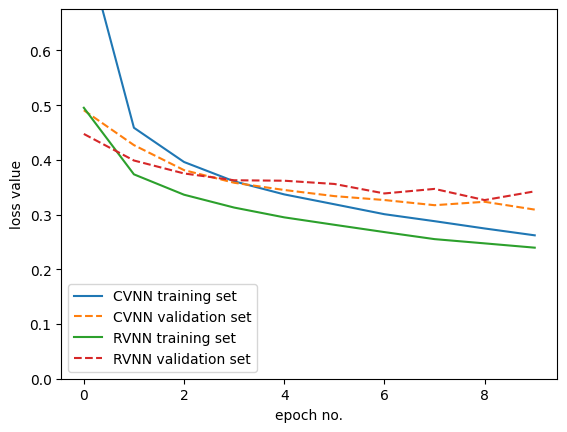

In [50]:
plot_loss_history_comparision(RVMLPNN_history, CVCNN_history)

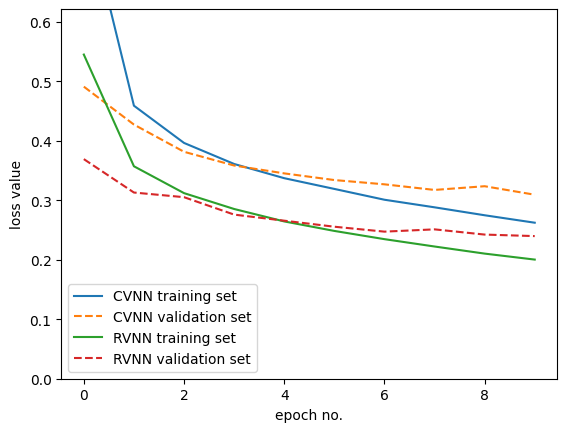

In [51]:
plot_loss_history_comparision(RVCNN_history, CVCNN_history)